# Andrea Fernanda Campos Pérez
## Modelo Morris-Lecar / Morris-Lecar Model

$\bullet$ For each bifurcation, provide an approximation of the critical value of the applied current $I_{Hopf,SNLC,HC}$ at which a Hopf, SNLC, HC bifurcation happens.

***

In [1]:
using Plots, DifferentialEquations

In [2]:
include("MLfunctions.jl")

ndot (generic function with 1 method)

## Equations and relevant parameters of Morris Lecar Model

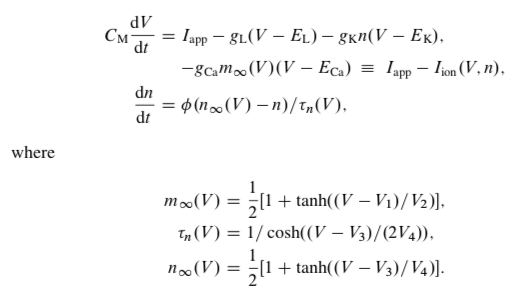

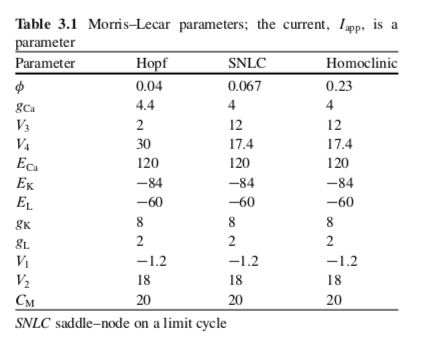

## Morris-Lecar calculated with Differential Equations

In [3]:
function MLdiffEq(du,u,p,t)
    ϕ=p[1]
    gCa=p[2]
    V3=p[3]
    V4=p[4]
    ECa=p[5]
    EK=p[6]
    EL=p[7]
    gK=p[8]
    gL=p[9]
    V1=p[10]
    V2=p[11]
    CM=p[12]
    Iapp=p[13]
    
    V=u[1]
    n=u[2]
    du[1]=Vdot(V,n,Iapp,gL,EL,gK,EK,gCa,ECa,CM,V1,V2)
    du[2]=ndot(V,n,ϕ,V3,V4)
end

MLdiffEq (generic function with 1 method)

## Part 1. Hopf Bifurcation
***

In [4]:
T=500.0
tspan=(0.0,T)

## Hopf
ϕ=0.04
gCa=4.4
V3=2.0
V4=30.0
ECa=120.0
EK=-84.0
EL=-60.0
gK=8.0
gL=2.0
V1=-1.2
V2=18.0
CM=20.0

Iapp= 89.0 #Iapp= 89, Valor crítico aproximado para la bifurcacion Supercritica Hopf que da la aparicion de un ciclo limite estable
#Iapp= 217 valor critico aproximado para la desaparicion de ciclo limite, esto pasa tipicamente a traves de otra bifurcacion supercritica de Hopf

p=(ϕ,gCa,V3,V4,ECa,EK,EL,gK,gL,V1,V2,CM,Iapp)

V0=20*randn(1)[1]
n0=rand(1)[1]

prob = ODEProblem(MLdiffEq,[V0;n0],tspan,p)
@time sol = solve(prob);

 21.449460 seconds (59.23 M allocations: 2.936 GiB, 6.17% gc time)


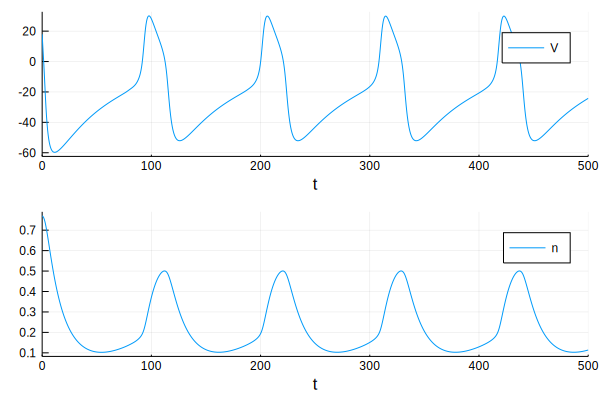

In [5]:
p1=plot(sol,vars=(0,1),label="V")
p2=plot(sol,vars=(0,2),label="n")
plot(p1,p2,layout=(2,1))

### Phase Portrait

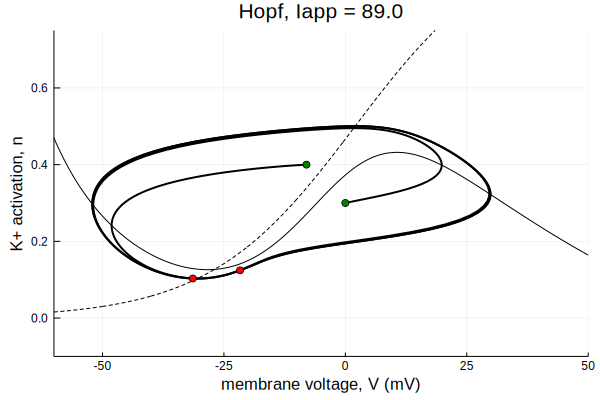

In [6]:
V = -60:0.01:50
n = -0.1:0.01:0.75
Vnullcline(V,n)=Iapp-Iion(V,n,gL,EL,gK,EK,gCa,ECa,V1,V2)
nnullcline(V,n)=ninf(V,V3,V4)-n
contour(V,n,Vnullcline,levels=[0.0],line=(1,:black))
contour!(V,n,nnullcline,levels=[0.0],line=(1,:black,:dash),colorbar=false)

V0=-8.0
n0=0.4
prob = ODEProblem(MLdiffEq,[V0;n0],tspan,p,)
sol = solve(prob)
plot!(sol,vars=(1,2),lw=2.0,lc=:black,legend=false)

V0=0.0
n0=0.3
prob = ODEProblem(MLdiffEq,[V0;n0],tspan,p,)
sol2 = solve(prob)

mlx= [-8, 0.0]  #Condiciones iniciales del sistema en V (ie x)
mly= [0.4, 0.3]  #Condiciones iniciales en n (ie y)
vf= [sol[1,length(sol[1,:])], sol2[1,length(sol2[1,:])]]  #Condiciones finales de v (ie x)
nf= [sol[2,length(sol[2,:])], sol2[2,length(sol2[2,:])]]  #Condiciones finales de n (ie y)

plot!(sol2,vars=(1,2),lw=2.0,lc=:black, legend=false,xlim=(-50,50), ylim=(-0.1,0.75), title="Hopf, Iapp = 89.0", ylabel="K+ activation, n", xlabel="membrane voltage, V (mV)")
scatter!(mlx, mly, color="green")
scatter!(vf, nf, color="red")

xlims!(-60,50)

## Part 2. Homoclinic Bifurcation
***

In [7]:
T=500.0
tspan=(0.0,T)

## HC
ϕ=0.23
gCa=4.0
V3=12.0
V4=17.4
ECa=120.0
EK=-84.0
EL=-60.0
gK=8.0
gL=2.0
V1=-1.2
V2=18.0
CM=20.0

Iapp= 35.1# I app= 35.1 Valor critico aproximado para la bifurcacion homoclina

p=(ϕ,gCa,V3,V4,ECa,EK,EL,gK,gL,V1,V2,CM,Iapp)

V0=20*randn(1)[1]
n0=rand(1)[1]

prob = ODEProblem(MLdiffEq,[V0;n0],tspan,p)
@time sol = solve(prob);

  0.315415 seconds (622.01 k allocations: 30.441 MiB)


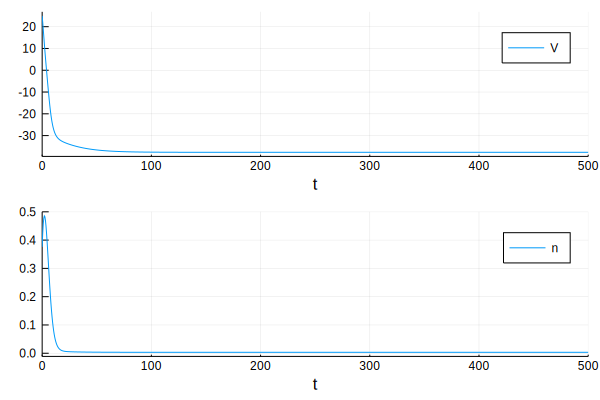

In [8]:
p1=plot(sol,vars=(0,1),label="V")
p2=plot(sol,vars=(0,2),label="n")
plot(p1,p2,layout=(2,1))

### Phase Portrait

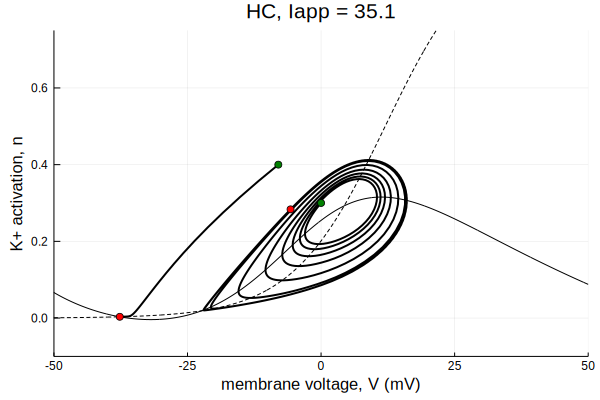

In [10]:
V = -60:0.01:50
n = -0.1:0.01:0.75
Vnullcline(V,n)=Iapp-Iion(V,n,gL,EL,gK,EK,gCa,ECa,V1,V2)
nnullcline(V,n)=ninf(V,V3,V4)-n
contour(V,n,Vnullcline,levels=[0.0],line=(1,:black))
contour!(V,n,nnullcline,levels=[0.0],line=(1,:black,:dash),colorbar=false)

V0=-8.0
n0=0.4
prob = ODEProblem(MLdiffEq,[V0;n0],tspan,p,)
sol = solve(prob)
plot!(sol,vars=(1,2),lw=2.0,lc=:black,legend=false)

V0=0.0
n0=0.3
prob = ODEProblem(MLdiffEq,[V0;n0],tspan,p,)
sol2 = solve(prob)

mlx= [-8.0, 0.0]  #Condiciones iniciales del sistema en V (ie x)
mly= [0.4, 0.3]  #Condiciones iniciales en n (ie y)
vf= [sol[1,length(sol[1,:])], sol2[1,length(sol2[1,:])]]  #Condiciones finales de v (ie x)
nf= [sol[2,length(sol[2,:])], sol2[2,length(sol2[2,:])]]  #Condiciones finales de n (ie y)

plot!(sol2,vars=(1,2),lw=2.0,lc=:black, legend=false, title="HC, Iapp = 35.1", ylabel="K+ activation, n", xlabel="membrane voltage, V (mV)")
scatter!(mlx, mly, color="green")
scatter!(vf, nf, color="red")

xlims!(-50,50)
ylims!(-0.1,0.75)

#Zoom a los puntos de equilibrio 
#xlims!(-50, -10)
#ylims!(-0.01,0.2)


## Part 3. SNLC Bifurcation (Saddle-Node on a Limit Cycle)
***

In [11]:
T=500.0
tspan=(0.0,T)

## SNLC
ϕ=0.067
gCa=4.0
V3=12.0
V4=17.4
ECa=120.0
EK=-84.0
EL=-60.0
gK=8.0
gL=2.0
V1=-1.2
V2=18.0
CM=20.0

Iapp= 40.2 #I= 40.2 es el valor critico para encontrar la bifurcacion SNLC, es decir, debajo de este valor la bifurcacion desaparece

p=(ϕ,gCa,V3,V4,ECa,EK,EL,gK,gL,V1,V2,CM,Iapp)

V0=20*randn(1)[1]
n0=rand(1)[1]

prob = ODEProblem(MLdiffEq,[V0;n0],tspan,p)
@time sol = solve(prob);

  0.000289 seconds (794 allocations: 73.234 KiB)


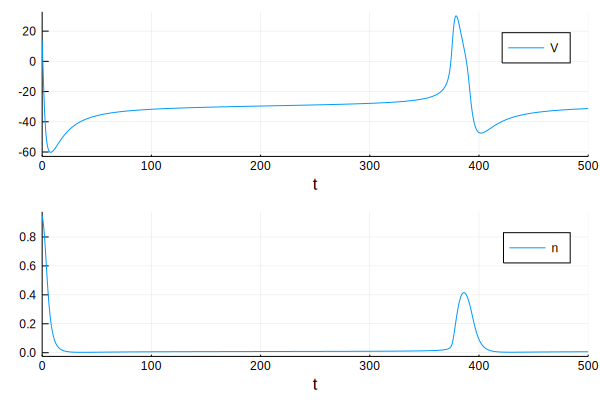

In [12]:
p1=plot(sol,vars=(0,1),label="V")
p2=plot(sol,vars=(0,2),label="n")
plot(p1,p2,layout=(2,1))

### Phase Portrait

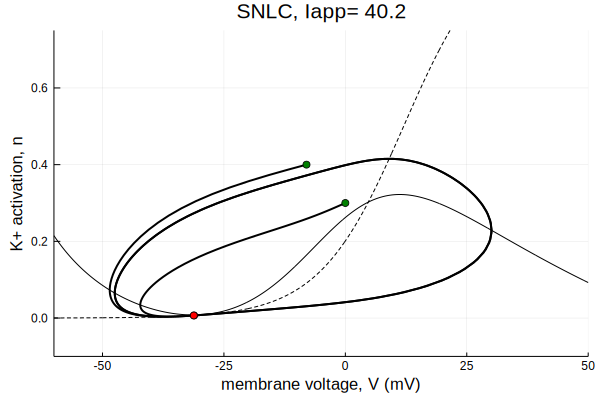

In [14]:
V = -60:0.01:50
n = -0.1:0.01:0.75
Vnullcline(V,n)=Iapp-Iion(V,n,gL,EL,gK,EK,gCa,ECa,V1,V2)
nnullcline(V,n)=ninf(V,V3,V4)-n
contour(V,n,Vnullcline,levels=[0.0],line=(1,:black), xlabel="membrane voltage, V (mV)", ylabel="K+ activation, n", title="SNLC, Iapp= 40.2")
contour!(V,n,nnullcline,levels=[0.0],line=(1,:black,:dash),colorbar=false)

V0=-8.0
n0=0.4
prob = ODEProblem(MLdiffEq,[V0;n0],tspan,p,)
sol = solve(prob)
plot!(sol,vars=(1,2),lw=2.0,lc=:black,legend=false)

V0=0.0
n0=0.3
prob = ODEProblem(MLdiffEq,[V0;n0],tspan,p,)
sol2 = solve(prob)

mlx= [-8, 0.0]  #Condiciones iniciales del sistema en V (ie x)
mly= [0.4, 0.3]  #Condiciones iniciales en n (ie y)
vf= [sol[1,length(sol[1,:])], sol2[1,length(sol2[1,:])]]  #Condiciones finales de v (ie x)
nf= [sol[2,length(sol[2,:])], sol2[2,length(sol2[2,:])]]  #Condiciones finales de n (ie y)

plot!(sol2,vars=(1,2),lw=2.0,lc=:black, legend=false, ylim=(-0.1,0.75))
scatter!(mlx, mly, color="green")
scatter!(vf, nf, color="red")

xlims!(-60,50)

#ZOOM 
#xlims!(-50,-10) 
#ylims!(-0.05, 0.2)